# IBM MACHINE LEARNING PROFESSIONAL CERTIFICATE SPECIALIZATION: DEEP LEARNING AND REINFORCEMENT LEARNING
##By: DENNIS KWEKU BOTWE 

## Data Description 
The telco company’s data set is available on Kaggle, which stems from the IBM sample set collection. The company provides home and internet services to 7043 customers in California. Our challenge is to help the company analyze all relevant customer data to develop focused customer retention programs.The data is obtained from kaggle(https://www.kaggle.com/datasets/blastchar/telco-customer-churn).  
The dataset consists of 7043 columns and 21 rows.
Churn is the target variable to predict. This column is 'Yes' if the customer churned  or 'No' if the customer is still with the company. 


## importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

from keras.models import Sequential 
from keras.layers import Input, Dense, Dropout 
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.constraints import MaxNorm

In [ ]:
# loading data
df = pd.read_csv('data/customer_churn_data.csv')

In [ ]:
### data shape
df.shape

(7043, 21)

The dataset consists of 7043 columns and 21 rows.

In [ ]:
#reading data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Churn is the target variable to predict. This column is 'Yes' if the customer churned  or 'No' if the customer is still with the company.Other attributes which the dataset contains are:

In [ ]:
# data columns
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

## Plan for Data exploration
Here are the steps I will use to establish a baseline model to determine whether there is any strong correlation between the different factors and the target variable:
1. Data Overview
2. Data Cleaning and Feature Engineering: Numeric Data
3. Data Cleaning and Feature Engineering: Categorical Data
4. Hypothesis Testing


## Data Overview

In [ ]:
df.shape  #shape data

(7043, 21)

 The dataset has **7043 rows** and **21
  columns**

In [ ]:
df.columns.tolist() # columns in the dataframe


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

The columns in the dataset with the target variable being **Churn**

In [ ]:
#data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset consists of both numeric and categorical values 
There are no missing values in the dataset
There were two numeric data types, int64 and float64.  

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


On average, telecom customers remain for 32 months and pay $64 per month, though this could result from different contracts.

In [ ]:
# unique value counts 
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

The Churn column contains two value counts with less 'Yes' than 'No'
This interpret more customers leaving the company.

## Data Cleaning

**customerID** column drop since unique values does not help in training model
20 columns remaining.

In [ ]:
df.drop("customerID", axis=1, inplace=True)

Changed the data type of 'TotalCharges' from an interger to a float

In [ ]:
df.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace= True)
df.TotalCharges.replace([" "], ["0"], inplace= True) 
df.TotalCharges = df.TotalCharges.astype(float) 
df.Churn.replace(["Yes", "No"], [1, 0], inplace= True)

## Feature Engineering for Numerical columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f800f621a90>,
      dtype=object)

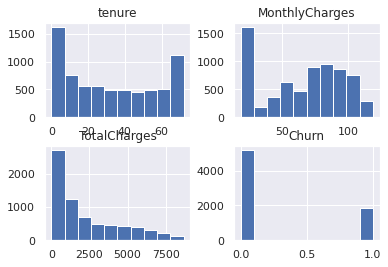

In [ ]:
num_cols = df.select_dtypes('number')
num_cols.hist()

Some of the features seem to be skewed.
Perfi

## Feature Engineering for Categorical columns



label encoding is quite pivotal as they encode categorical labels with appropriate numerical values.
Any categorical variable that has more than two unique values are dealt with Label Encoding.

The five newly encoded columns:
PaperlessBilling, Partner, Dependents, Churn, PhoneService 

In [ ]:
#Convert rest of categorical variable into dummy:
df= pd.get_dummies(df)
df.shape

(7043, 47)

After the transformation, 22 new rows were added. 
Making it a total of 42 columns and 7043 rows

In [ ]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   Churn                                    7043 non-null   int64  
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   SeniorCitizen_No                         7043 non-null   uint8  
 7   SeniorCitizen_Yes                        7043 non-null   uint8  
 8   Partner_No                               7043 non-null   uint8  
 9   Partner_Yes                              7043 non-null   uint8  
 10  Dependents_No                            7043 no

split data
normalise data
build model



## Data Split

In [ ]:
X_data = df.drop(['Churn'], axis=1)
y_data = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42, shuffle=True)

## Normalization

In [ ]:
normalize = MinMaxScaler()
X_train_norm = normalize.fit_transform(X_train)
X_test_norm = normalize.transform(X_test)

## ANN Model 1

In [ ]:
X_train_norm.shape[1]

46

In [ ]:
#Create model
#Create Layers 
#compile model
#Run History
#Model summary
#test model accuracy
#Plot accuracy and converging graph

#Create model 
model_1 = Sequential()
model_1.add(Dense(units=12, input_shape=(X_train_norm.shape[1],), activation='relu'))
model_1.add(Dense(6, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
## model summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 12)                564       
                                                                 
 dense_6 (Dense)             (None, 6)                 78        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model Compilation
model_1.compile(Adam(lr=.003), 'binary_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm,y_test), epochs=15, batch_size=15)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


329/329 [==============================] - 1s 3ms/step - loss: 0.4965 - accuracy: 0.7564 - val_loss: 0.4225 - val_accuracy: 0.7989
Epoch 2/15
329/329 [==============================] - 1s 3ms/step - loss: 0.4330 - accuracy: 0.7933 - val_loss: 0.4141 - val_accuracy: 0.8022
Epoch 3/15
329/329 [==============================] - 1s 2ms/step - loss: 0.4281 - accuracy: 0.8014 - val_loss: 0.4155 - val_accuracy: 0.8055
Epoch 4/15
329/329 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.7986 - val_loss: 0.4177 - val_accuracy: 0.8083
Epoch 5/15
329/329 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.8016 - val_loss: 0.4105 - val_accuracy: 0.8060
Epoch 6/15
329/329 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8034 - val_loss: 0.4222 - val_accuracy: 0.7941
Epoch 7/15
329/329 [==============================] - 1s 2ms/step - loss: 0.4202 - accuracy: 0.8020 - val_loss: 0.4111 - val_accuracy: 0.8074
Epoch 8/15
329/32

In [ ]:
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

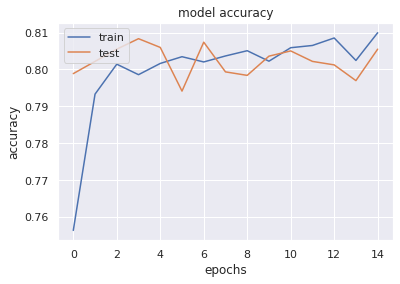

In [ ]:
plt.plot(history_1.history['accuracy']) 
plt.plot(history_1.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

## Model 2:

In [ ]:
#Create model
#Create Layers 
#compile model
#Run History
#Model summary
#test model accuracy
#Plot accuracy and converging graph

#Create model 
model_2 = Sequential()
model_2.add(Dense(units=16, input_shape=(X_train_norm.shape[1],), activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
## model summary
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                752       
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


155/155 [==============================] - 1s 3ms/step - loss: 0.7160 - accuracy: 0.4375 - val_loss: 0.6689 - val_accuracy: 0.6010
Epoch 2/200
155/155 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.6935 - val_loss: 0.6154 - val_accuracy: 0.7246
Epoch 3/200
155/155 [==============================] - 0s 3ms/step - loss: 0.5956 - accuracy: 0.7363 - val_loss: 0.5848 - val_accuracy: 0.7283
Epoch 4/200
155/155 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.7373 - val_loss: 0.5639 - val_accuracy: 0.7283
Epoch 5/200
155/155 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.7371 - val_loss: 0.5464 - val_accuracy: 0.7283
Epoch 6/200
155/155 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.7371 - val_loss: 0.5306 - val_accuracy: 0.7283
Epoch 7/200
155/155 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.7373 - val_loss: 0.5154 - val_accuracy: 0.7288
Epoch 8/200

In [ ]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show>

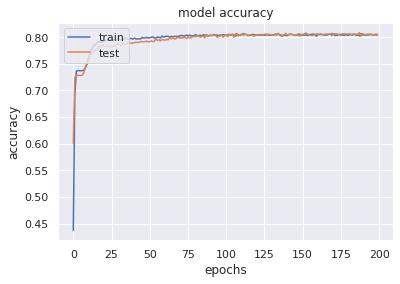

In [ ]:
## plotting model accuracy
plt.plot(run_hist_2.history['accuracy'])
plt.plot(run_hist_2.history['val_accuracy'])
plt.title('model accuracy') 
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show

the test had a higher accuracy compared to the train score.<br>
this implies that the model generalized well to the data.

## Model 3

In [ ]:
# create model
import tensorflow as tf

model_3 = Sequential()

#first layer
model_3.add(Dense(12, input_shape=(X_train_norm.shape[1],), activation='relu'))


#Second layer
model_3.add(Dense(12, activation='relu'))


#output
model_3.add(Dense(1, activation='sigmoid'))

#summary
model_3.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 12)                564       
                                                                 
 dense_39 (Dense)            (None, 12)                156       
                                                                 
 dense_40 (Dense)            (None, 1)                 13        
                                                                 
Total params: 733
Trainable params: 733
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model compile and history

model_3.compile(SGD(lr=.001), loss='binary_crossentropy', metrics=['accuracy'])
run_hist_3=model_3.fit(X_train_norm,y_train, validation_data=(X_test_norm,y_test), batch_size=15, epochs=50)

Epoch 1/20
329/329 [==============================] - 1s 3ms/step - loss: 0.4805 - accuracy: 0.7505 - val_loss: 0.4367 - val_accuracy: 0.7932
Epoch 2/20
329/329 [==============================] - 1s 3ms/step - loss: 0.4356 - accuracy: 0.7872 - val_loss: 0.4217 - val_accuracy: 0.7993
Epoch 3/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4290 - accuracy: 0.7919 - val_loss: 0.4244 - val_accuracy: 0.7989
Epoch 4/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4255 - accuracy: 0.7951 - val_loss: 0.4206 - val_accuracy: 0.7993
Epoch 5/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4225 - accuracy: 0.8004 - val_loss: 0.4183 - val_accuracy: 0.8017
Epoch 6/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4211 - accuracy: 0.8018 - val_loss: 0.4189 - val_accuracy: 0.7998
Epoch 7/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4196 - accuracy: 0.7996 - val_loss: 0.4182 - val_accuracy: 0.8069
Epoch 

<function matplotlib.pyplot.show>

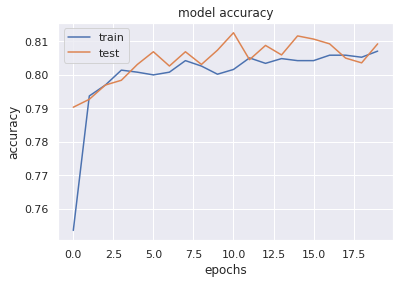

In [ ]:
plt.plot(run_hist_3.history['accuracy'])
plt.plot(run_hist_3.history['val_accuracy'])
plt.title('model accuracy') 
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show